In [ ]:
 pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, multilabel_confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import keras_tuner as kt

In [ ]:
data = pd.read_csv('/content/ai4i2020.csv')
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

# Praproses Data

In [ ]:
# Memeriksa missing values
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
# Memeriksa data duplikasi
data.duplicated().sum()

0

In [ ]:
# Membuang kolom yang tidak diperlukan
data = data.drop(['UDI', 'Product ID'], axis=1)

In [ ]:
# Encoding untuk kolom "Type"
le = LabelEncoder()
data['Type'] = le.fit_transform(data['Type'])

In [ ]:
# Fitur-fitur
features = data[['Air temperature [K]',
                 'Process temperature [K]',
                 'Rotational speed [rpm]',
                 'Torque [Nm]', 'Tool wear [min]']]

In [ ]:
# Label data
labels_failure = data['Machine failure']

In [ ]:
# Standardisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled,
                                                    labels_failure, test_size=0.2,
                                                    random_state=42)

In [ ]:
X_train

array([[-0.85239738, -0.61035546,  0.43075634, -0.89150501,  1.36759909],
       [-0.90239341, -1.08216166, -0.84103188,  1.38568287,  0.45637958],
       [-0.90239341, -1.48656697, -0.06010929, -0.89150501,  1.35188841],
       ...,
       [ 1.39742414,  1.54647288, -0.31112012,  0.723593  ,  1.80749816],
       [-1.95231012, -2.09317494,  0.01240496, -0.74103004, -1.17753127],
       [ 0.09752726,  0.26585605,  1.50173589, -1.42318324, -1.1461099 ]])

In [ ]:
y_train

9254    0
1561    0
1670    0
6087    0
6669    0
       ..
5734    1
5191    0
5390    0
860     0
7270    0
Name: Machine failure, Length: 8000, dtype: int64

In [ ]:
X_test

array([[ 3.97503465e-01,  1.98455168e-01, -4.32910016e-03,
        -3.89921778e-01,  1.41473113e+00],
       [ 1.79739241e+00,  1.20946845e+00, -6.56957265e-01,
         4.82833050e-01, -1.09204945e-01],
       [-8.52397376e-01, -1.41916609e+00, -2.99964081e-01,
         2.01946439e-01,  1.42165954e-01],
       ...,
       [ 1.47523296e-01,  1.14206757e+00, -1.23707119e+00,
         1.65653782e+00, -1.58600898e+00],
       [-1.55234185e+00, -1.68876963e+00,  6.59446679e+00,
        -3.07840791e+00, -1.41319148e+00],
       [ 4.97495532e-01,  1.07466668e+00, -1.32631948e+00,
         1.50606285e+00, -1.55458761e+00]])

In [ ]:
y_test

6252    0
4684    1
1731    0
4742    0
4521    0
       ..
6412    0
8285    0
7853    0
1095    1
6929    0
Name: Machine failure, Length: 2000, dtype: int64

# Model Prediksi Machine Failure

In [ ]:
model_failure = Sequential([
    Dense(64, input_dim=features_scaled.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
learning_rate = 0.001
model_failure.compile(loss='binary_crossentropy',
                      optimizer=Adam(learning_rate=
                      learning_rate), metrics=['accuracy'])

# Pelatihan model
batch_size = 32
epochs = 50
history = model_failure.fit(X_train, y_train,
                            epochs=epochs, batch_size=batch_size,
                            validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 4s 7ms/step - loss: 0.3358 - accuracy: 0.8941 - val_loss: 0.1867 - val_accuracy: 0.9588
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.1780 - accuracy: 0.9667 - val_loss: 0.1628 - val_accuracy: 0.9588
Epoch 3/50
200/200 [==============================] - 1s 6ms/step - loss: 0.1598 - accuracy: 0.9669 - val_loss: 0.1419 - val_accuracy: 0.9588
Epoch 4/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1405 - accuracy: 0.9669 - val_loss: 0.1264 - val_accuracy: 0.9588
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.1279 - accuracy: 0.9661 - val_loss: 0.1213 - val_accuracy: 0.9588
Epoch 6/50
200/200 [==============================] - 1s 6ms/step - loss: 0.1237 - accuracy: 0.9673 - val_loss: 0.1204 - val_accuracy: 0.9588
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 0.1209 - accuracy: 0.9683 - val_loss: 0.1161 - val_accuracy: 0.9594
Epoch 

In [ ]:
# Prediksi Model
y_pred_train = model_failure.predict(X_train) > 0.5
y_pred_test = model_failure.predict(X_test) > 0.5

63/63 [==============================] - 0s 1ms/step


In [ ]:
# Evaluasi model secara keseluruhan
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-Score: {f1_test}")
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 0.9805
Test Accuracy: 0.976
Precision: 0.6756756756756757
Recall: 0.4098360655737705
F1-Score: 0.5102040816326531
Confusion Matrix:
[[1927   12]
 [  36   25]]


In [ ]:
report = classification_report(y_test, y_pred_test)
print(f'Hasil Klasifikasi:\n{report}')

Hasil Klasifikasi:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.68      0.41      0.51        61

    accuracy                           0.98      2000
   macro avg       0.83      0.70      0.75      2000
weighted avg       0.97      0.98      0.97      2000



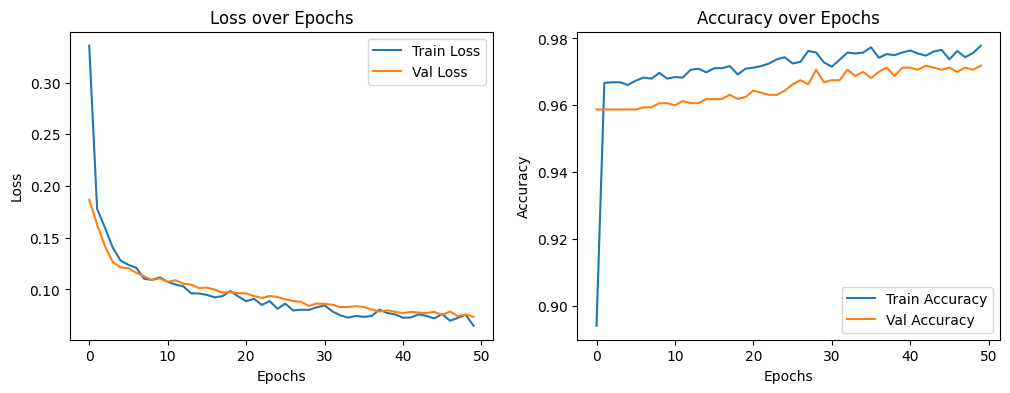

In [ ]:
# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()